# DHCP Server

    DHCP服务器是为客户端机器分配IP地址的，所有分配的IP地址都保存在DHCP服务器的数据库中。为了在子网中实现DHCP分配IP地址，需要在目标主机上安装配置DHCP服务。
    
    1. 安装DHCP Server:
    
    sudo apt-get install isc-dhcp-server
    
    DHCP的主要配置文件有两个，分别位于 /etc/default/isc-dhcp-server 和 /etc/dhcp/dhcpd.conf，下面要做的就是对这两个文件进行配置。
    
    2. 指定那个网口作为DHCP Server：
    
    针对Linux系统： 配置 --- System Setting --- Network --- 配置对应网口为静态IP并指定IP地址。

    3. 修改配置文件：
    
        3.1 ifconfig找出网口名字。

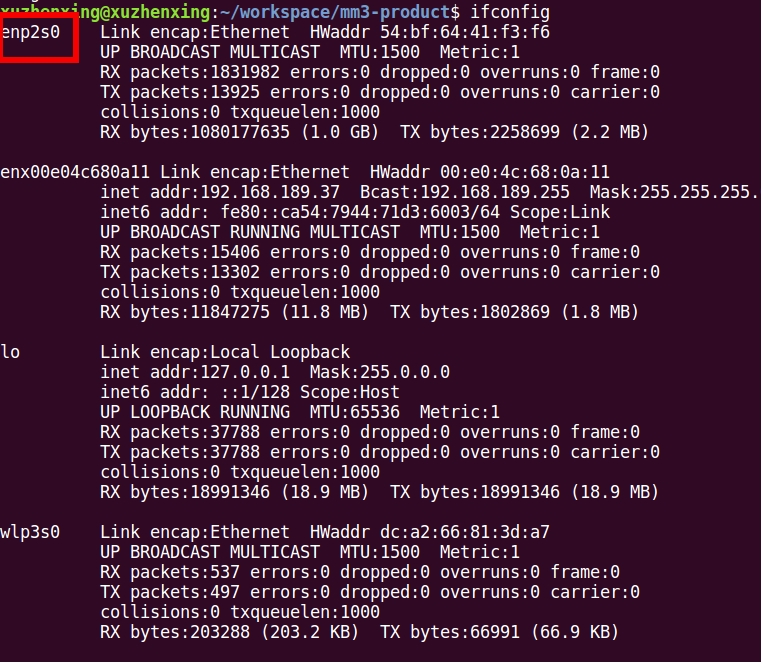

In [5]:
from IPython.display import Image
Image(filename='../images/ifconfig.png', width=650, height=600)

        3.2 修改/etc/default/isc-dhcp-server配置文件：
    
            sudo vim /etc/default/isc-dhcp-server
    
            修改INTERFACES="enp2s0" 

        3.3 修改/etc/dhcp/dhcpd.conf配置文件：
    
            sudo vim /etc/dhcp/dhcpd.conf
    
            可以修改lease时间，决定了能多长时间后就可以不同MAC地址分配相同的IP地址。

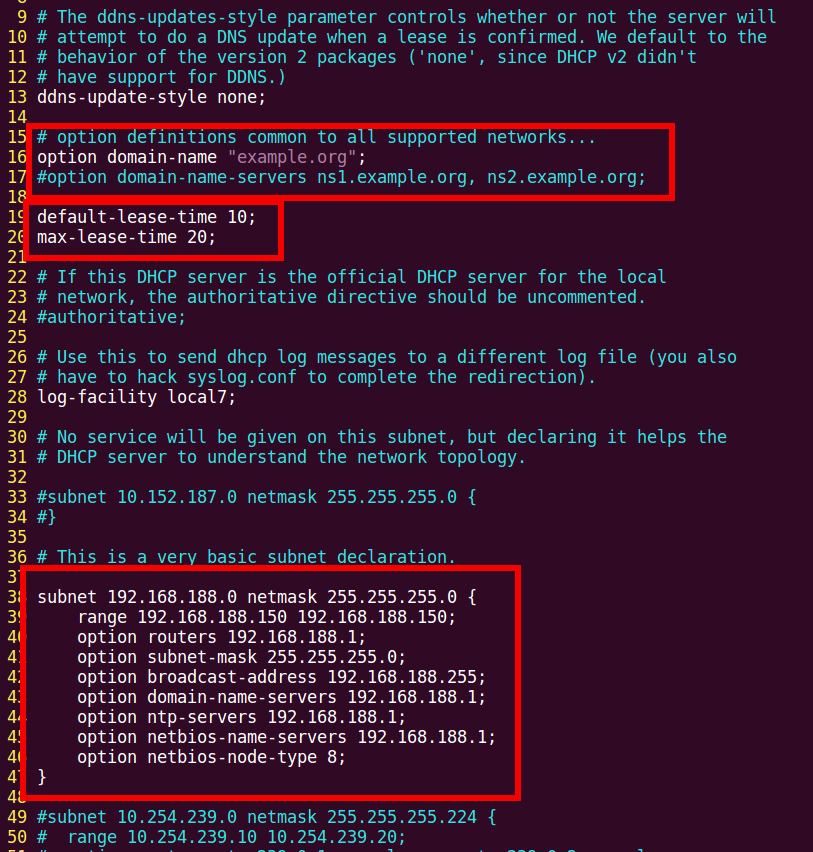

In [4]:
from IPython.display import Image
Image(filename='../images/dhcp.png', width=650, height=600)

In [ ]:
subnet 192.168.188.0 netmask 255.255.255.0 {
    range 192.168.188.150 192.168.188.150;
    option routers 192.168.188.1;
    option subnet-mask 255.255.255.0;
    option broadcast-address 192.168.188.255;
    option domain-name-servers 192.168.188.1;
    option ntp-servers 192.168.188.1;
    option netbios-name-servers 192.168.188.1;
    option netbios-node-type 8;
}

    4. 重启dhcp server和查询dhcp server是否启动。
    
    sudo service isc-dhcp-server restart

    sudo netstat -uap